<a href="https://colab.research.google.com/github/jdxxmahmud/Deep-Learning-Practice/blob/main/Linear-Classification-Examples/Linear_Classification__Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

## Load the data

In [2]:
from sklearn.datasets import load_wine

# load the data
data = load_wine()

## Take a look at the data

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
data.data.shape

(178, 13)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
print(data.target_names)

['class_0' 'class_1' 'class_2']


In [8]:
print(data.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## Splitting for test and training

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X=X_train)
X_test = scaler.fit_transform(X=X_test)

#### **Build the model using tensorflow

In [29]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D, )),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)


print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

Epoch 1/500
4/4 [==============================] - 0s 27ms/step - loss: 1.9407 - accuracy: 0.3193 - val_loss: 2.0690 - val_accuracy: 0.3051
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 1.9125 - accuracy: 0.3193 - val_loss: 2.0429 - val_accuracy: 0.3051
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 1.8851 - accuracy: 0.3193 - val_loss: 2.0166 - val_accuracy: 0.3051
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 1.8586 - accuracy: 0.3193 - val_loss: 1.9906 - val_accuracy: 0.3051
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 1.8324 - accuracy: 0.3277 - val_loss: 1.9644 - val_accuracy: 0.3051
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 1.8054 - accuracy: 0.3277 - val_loss: 1.9385 - val_accuracy: 0.3220
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 1.7781 - accuracy: 0.3445 - val_loss: 1.9132 - val_accuracy: 0.3220
Epoch 8/500
4/4 [=========

## Check how good the model is doing

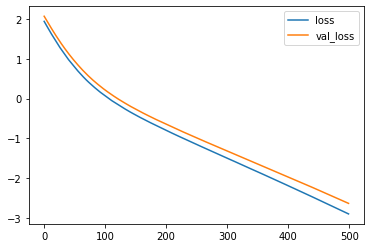

In [30]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

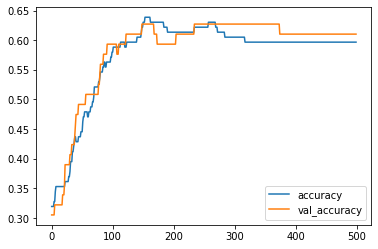

In [31]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()